# Multi input models

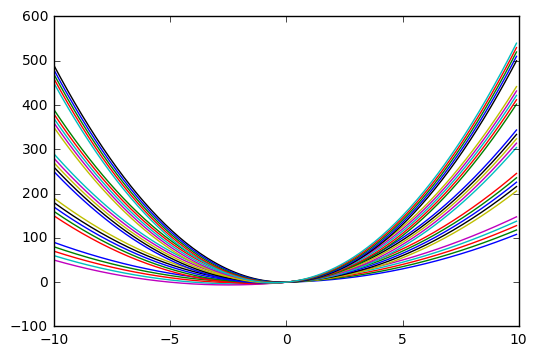

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pars=[(x,y) for x in np.arange(1,6) for y in np.arange(1,6)]

x = np.arange(-10,10,0.1)

data=pd.DataFrame(columns=['x','y','a','b','index'])

for i,j in enumerate(pars):
    y = j[0]*x**2 + j[1]*x
    data=pd.concat((data,pd.DataFrame({'x':x,'y':y,'a':j[0],'b':j[1],'index':i})))
    plt.plot(x,y)

data.head()
data=data.reset_index()

## Understanding how to fit a single parabola

In [47]:
data_small=data[data['index']==0]
len(data_small)

200

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_19 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
dense_25 (Dense)                 (None, 3)             6           input_19[0][0]                   
____________________________________________________________________________________________________
dense_26 (Dense)                 (None, 3)             12          dense_25[0][0]                   
____________________________________________________________________________________________________
out (Dense)                      (None, 1)             4           dense_26[0][0]                   
Total params: 22
__________________________________________________________________________

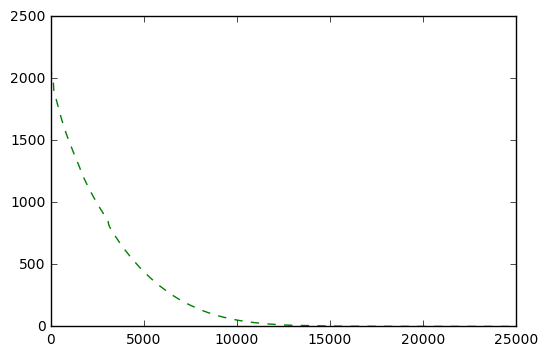

In [63]:
from keras.layers import Input, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(1,))
x = Dense(3,activation='relu')(input1)
x = Dense(3,activation='tanh')(x)
prediction = Dense(1,activation='linear',name='out')(x)

model_0 = Model(input=input1, output=prediction)
model_0.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_0.summary()

model_0.fit(data_small['x'],data_small['y'],batch_size=100, nb_epoch=15000, verbose=0)

plt.plot(model_0.history.epoch, model_0.history.history['loss'], 'g--')
print ("loss:",model_0.history.history['loss'][-1],"mae:",model_0.history.history['mean_absolute_error'][-1])

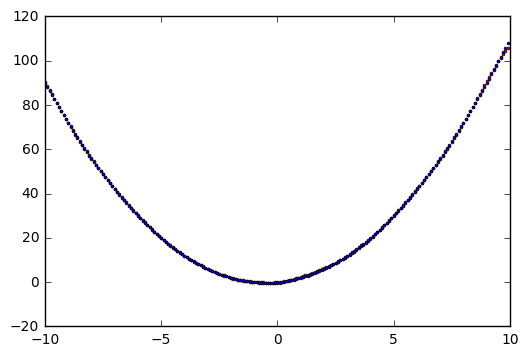

In [64]:
# show both observed and predicted in one graph. If you see only one line: very good fit!
plt.plot(data_small['x'],model_0.predict(data_small['x']),'ro',data_small['x'],data_small['y'],'bo',markersize=2)
plt.show()

## Building a model that will never fit


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_21 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
dense_29 (Dense)                 (None, 3)             6           input_21[0][0]                   
____________________________________________________________________________________________________
dense_30 (Dense)                 (None, 3)             12          dense_29[0][0]                   
____________________________________________________________________________________________________
out (Dense)                      (None, 1)             4           dense_30[0][0]                   
Total params: 22
__________________________________________________________________________

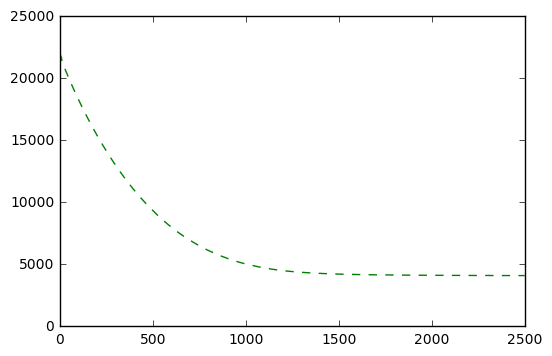

In [66]:
from keras.layers import Input, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(1,))
x = Dense(3,activation='relu')(input1)
x = Dense(3,activation='tanh')(x)
prediction = Dense(1,activation='linear',name='out')(x)

model_1 = Model(input=input1, output=prediction)
model_1.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_1.summary()

model_1.fit(data['x'],data['y'],batch_size=100, nb_epoch=2500, verbose=0)

plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--')
print ("loss:",model_1.history.history['loss'][-1],"mae:",model_1.history.history['mean_absolute_error'][-1])

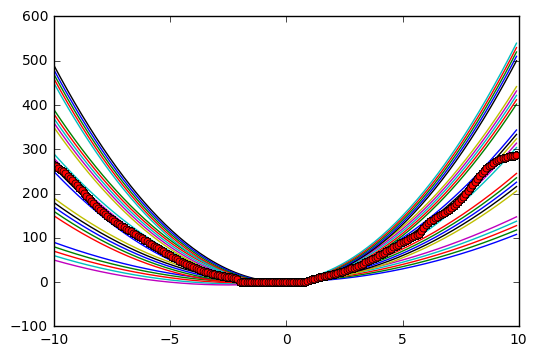

In [67]:
#plt.figure(1)
x = np.arange(-10,10,0.1)
for i,j in enumerate(pars):
    y = j[0]*x**2 + j[1]*x
    plt.plot(x,y)
plt.plot(data['x'],model_1.predict(data['x']),'ro',markersize=5)
plt.show()

## Building a model that becomes too large with many predictors

In [68]:
#create the one hot coding for the index
x_data=pd.concat((data['x'],pd.get_dummies(data['index'])),axis=1)
x_data.head(5)

,x,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,-10.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-9.9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-9.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-9.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-9.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_23 (InputLayer)            (None, 26)            0                                            
____________________________________________________________________________________________________
dense_33 (Dense)                 (None, 3)             81          input_23[0][0]                   
____________________________________________________________________________________________________
dense_34 (Dense)                 (None, 3)             12          dense_33[0][0]                   
____________________________________________________________________________________________________
out (Dense)                      (None, 1)             4           dense_34[0][0]                   
Total params: 97
__________________________________________________________________________

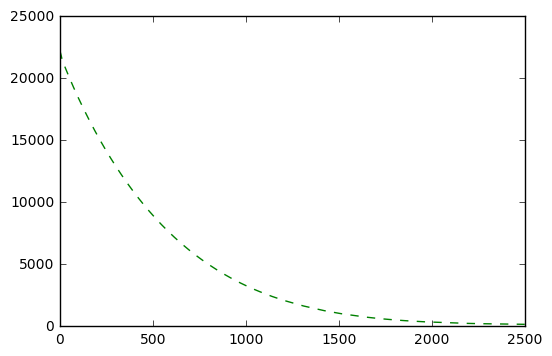

In [70]:
from keras.layers import Input, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(26,))
x = Dense(6,activation='relu')(input1)
x = Dense(6,activation='tanh')(x)
prediction = Dense(1,activation='linear',name='out')(x)

model_2 = Model(input=input1, output=prediction)
model_2.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_2.summary()

model_2.fit(x_data.values,data['y'],batch_size=100, nb_epoch=2500, verbose=0)

plt.plot(model_2.history.epoch, model_2.history.history['loss'], 'g--')
print ("loss:",model_2.history.history['loss'][-1],"mae:",model_2.history.history['mean_absolute_error'][-1])

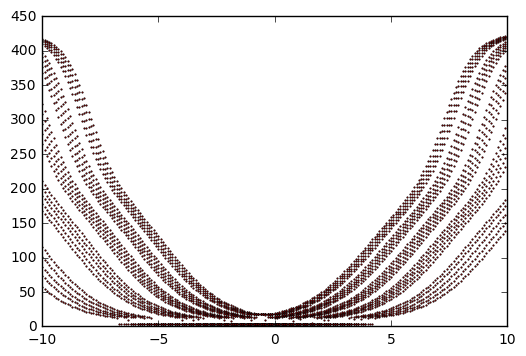

In [71]:
plt.plot(data['x'],model_2.predict(x_data.values),'ro',markersize=1)
plt.show()

## A multi input with embedding

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_29 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_6 (Embedding)          (None, 1, 2)          54          input_29[0][0]                   
____________________________________________________________________________________________________
input_28 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
reshaped_embedding (Reshape)     (None, 2)             0           embedding_6[0][0]                
___________________________________________________________________________________________

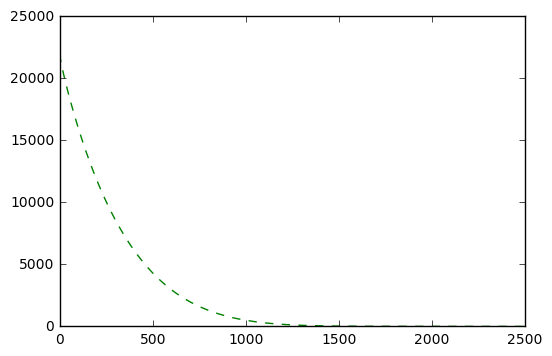

In [77]:
from keras.layers import Input, Reshape, Dense, Embedding, merge
from keras.models import Model

input1 = Input(shape=(1,))

input2 = Input(shape=(1,))
x2 = Embedding(input_dim=27,output_dim=2)(input2)
x2 = Reshape((2,),name="reshaped_embedding")(x2)

concat = merge([input1, x2], mode='concat')
x3=Dense(6,activation='relu')(concat)
x3=Dense(6,activation='tanh')(x3)

prediction = Dense(1,activation='linear',name='out')(x3)

model_3 = Model(input=[input1,input2], output=prediction)
model_3.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_3.summary()

model_3.fit([data['x'],data['index']],data['y'],batch_size=100, nb_epoch=2500, verbose=0)

plt.plot(model_3.history.epoch, model_3.history.history['loss'], 'g--')
print ("loss:",model_3.history.history['loss'][-1],"mae:",model_3.history.history['mean_absolute_error'][-1])

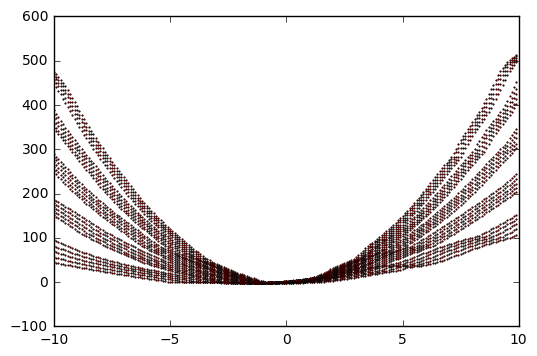

In [78]:
plt.plot(data['x'],model_3.predict([data['x'],data['index']]),'ro',markersize=1)
plt.show()

In [81]:
import pandas as pd
model_4 = Model(input=input2, output=model_3.get_layer("reshaped_embedding").output)

data

data=pd.concat( (data, pd.DataFrame(model_4.predict(data['index']),columns=['x1','x2'])),axis=1)

data=pd.concat( (data, pd.DataFrame(model_4.predict(data['index']),columns=['x1','x2'])),axis=1)
data.head(15)

data_small=data.groupby(['x1','x2','index','a','b']).count()
data_small=data_small.reset_index()
data_small['ab']='a:'+data_small['a'].map(str)+' b:'+data_small['b'].map(str)

In [82]:
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, LabelSet

bk.output_notebook()

source = ColumnDataSource(data_small)

toolbar="pan,wheel_zoom,box_zoom,reset"
p = figure(tools=toolbar, toolbar_location="above")
p.circle("x1", "x2",source=source)
#p.line("x1", "x2",source=source)   
    
labels = LabelSet(x="x1", y="x2", text="ab",text_font_size="8pt", source=source)
p.add_layout(labels)

    
show(p)

Loading BokehJS ...